# Felix-Rahmad-Algorithm
used as optimization algorithm for minimizing or maximizing function

## function example:
### $$y=100x + 2x^2$$

In [99]:
import numpy as np
import random

In [100]:
#range
start=-50.0
stop= 50.0
accuracy= 0.1
x= np.arange(start,stop,accuracy)

In [101]:
def f(x):
    return 100*x - 2*x**2

In [102]:
#initial population
#example: 5 candidates, 2 variables

candidate=10
variable=2
iteration = 10
method = 3
isminimize = False
ismaximize = False

if isminimize == False:
    ismaximize = True
    
x=[]
y=[]

for i in range(variable):
    temp_x=[]
    temp_y=[]
    for j in range(candidate):
        temp_x.append(np.round(random.uniform(start,stop),2))
        temp_y.append(np.round(f(temp_x[j]),2))
    x.append(temp_x)
    y.append(temp_y)

x= np.array(x)
y= np.array(y)
y= y.sum(axis=0)

In [103]:
print(x)
print(y)
print (isminimize, ismaximize)

[[  0.66 -26.53  47.96  48.11 -24.65 -40.34  47.42 -24.78 -42.76 -26.69]
 [ 16.78  -3.75  -5.67 -44.1   -1.24 -38.16 -29.29   4.2  -18.13 -27.14]]
[  1179.99  -4463.8    -435.62  -8117.76  -3807.32 -14017.    -4400.12
  -3321.38 -10403.23  -8280.87]
False True


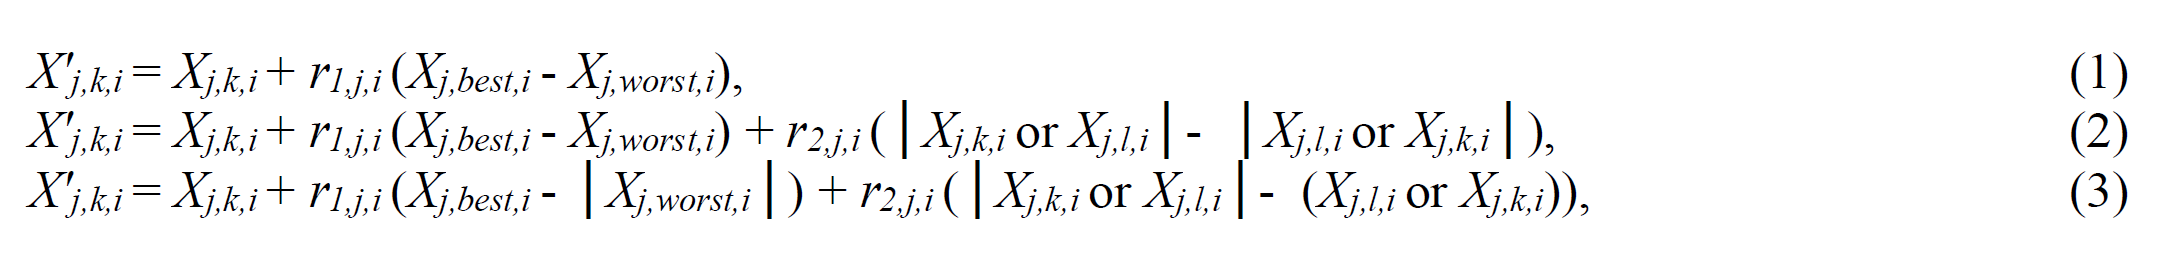

In [104]:
for a in range(iteration):
    x_new= x.copy()
    #find index of best and worst result
    if isminimize == True:
        best_index = y.argmin()
        worst_index = y.argmax()
    if ismaximize == True:
        best_index = y.argmax()
        worst_index = y.argmin()
    # print(x)
    
    #generate new values
    #3 methods available
    #method 1
    if method == 1:        
        for i,j in enumerate(x_new):
            for k in range(len(j)):
                r = np.round(random.random(),3)
                x_new[i,k] += np.round(r*(x_new[i,best_index] - x_new[i,worst_index]),2)
        y_new= np.round(f(x_new),3)
        y_new= y_new.sum(axis=0)
        # print('y_new:', y_new)
    
    
    if method == 2:
        for i,j in enumerate(x_new):
            for k in range(len(j)):
                l = int(np.round(random.uniform(0, candidate-1),0))
                #compare candidate vs candidate from random index
                if y[k] > y[l]:
                    multiplier = 1
                if y[k] < y[l]:
                    multiplier = -1
                #calculating new candidates
                r1= np.round(random.random(),3)
                r2= np.round(random.random(),3)
                x_new[i,k] += r1*(x_new[i, best_index] - x_new[i,worst_index]) + r2*multiplier*(abs(x_new[i, best_index]) - abs(x_new[i,l]))
        y_new= np.round(f(x_new),3)
        y_new= y_new.sum(axis=0)
        # print('y_new:', y_new)
    
    if method == 3:
        for i, j in enumerate(x_new):
            for k in range(len(j)):
                l = int(np.round(random.uniform(0, candidate-1),0))
                #compare candidate vs candidate from random index
                if y[k] > y[l]:
                    x_better = x_new[i,k]
                    x_worse = x_new[i,l]
                if y[k] < y[l]:
                    x_better = x_new[i,l]
                    x_worse = x_new[i,k]
                    
                #calculating new candidates
                r1= np.round(random.random(),3)
                r2= np.round(random.random(),3)
                x_new[i,k] += r1*(x_new[i, best_index] - abs(x_new[i, worst_index])) + r2*(abs(x_better) - x_worse)
        y_new = np.round(f(x_new),3)
        y_new = y_new.sum(axis=0)
        # print('y_new:',y_new)
    
    #compare f(x) with previous f(x). keep if  f(x) is lower
    if isminimize == True:
        iskeep = y_new > y
    if ismaximize == True:
        iskeep = y_new < y
        
    for index, elements in enumerate(x):
        for inner_index in range(len(x)):
            if iskeep[inner_index] == False:
                x[index, inner_index]= x_new[index,inner_index]
                
    if isminimize == True:            
        y = np.fmin(y,y_new)
    if ismaximize == True:
        y = np.fmax(y,y_new)
    
    # print('y:', y)

In [105]:
if isminimize == True:
    best_index = y.argmin()
    worst_index = y.argmax()
if ismaximize == True:
    best_index = y.argmax()
    worst_index = y.argmin()

status=[]
for index in range(candidate):
    status.append('-')

status[best_index]= 'Best'
status[worst_index]= 'Worst'

In [106]:
#show final iteration result in table form
import pandas as pd
columns = variable
col_name=[]
for column in range(variable):
    col_name.append(f'x{column+1}')
    
col_name.append('f(x)')
col_name.append('status')

In [107]:
result_df = pd.DataFrame(list(zip(*x,y,status)), columns =col_name)

In [108]:
result_df

,x1,x2,f(x),status
0,21.711147,26.659718,2472.858,Best
1,18.032146,19.116852,2333.675,-
2,47.960000,-5.670000,2343.291,-
3,48.110000,-44.100000,2426.601,-
4,-24.650000,-1.240000,1115.630,-
5,-40.340000,-38.160000,848.287,-
6,47.420000,-29.290000,1664.351,-
7,-24.780000,4.200000,1485.668,-
8,-42.760000,-18.130000,-596.059,Worst
9,-26.690000,-27.140000,686.349,-


In [109]:
result_df.loc[result_df['status'] == "Best"]

,x1,x2,f(x),status
0,21.711147,26.659718,2472.858,Best


In [110]:
result_df.loc[result_df['status'] == "Worst"]

,x1,x2,f(x),status
8,-42.76,-18.13,-596.059,Worst
